In [3]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

xpixels = 900
ypixels = 600

# get the size in inches
dpi = 72.
xinch = xpixels / dpi
yinch = ypixels / dpi

fig_size = [xinch, yinch]
plt.rcParams["figure.figsize"] = fig_size

Consider a mechanical system, with a mass connected horizontally to the wall by a spring with constant κ. The entire system is submersed in fluid, so that there is a drag coefficient γ and a constant external force F . The equation for this system is:

$m\ddot{x} + \gamma \dot{x} + \kappa x = F$

a) Rewrite this system as a set of two equations by setting $\dot{x} = y$.

$$\dot{x} = y$$
$$m\dot{y}+\gamma.y+\kappa.x=F$$

b) Numerically integrate the system using 
(i) Euler’s method, 
(ii) 4th-order Runge-Kutta, 
(iii) ode45 function. 

Include plots of x(t) and of y vs. x (phase space). The constants are set as $F = 1, m = 2, \gamma = 1, \kappa = 3$. Note the initial conditions chosen.

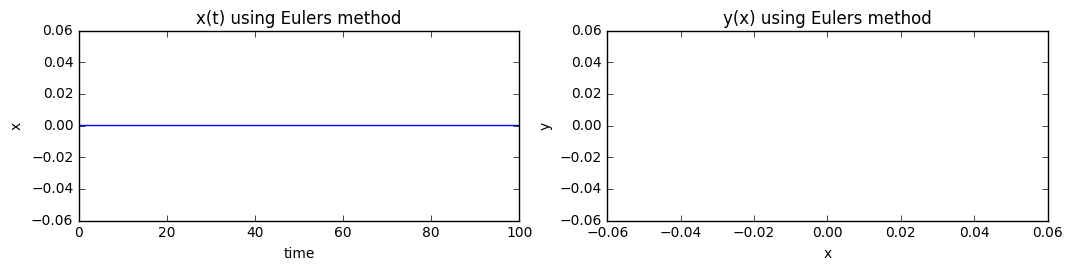

In [17]:
# Numerical integration (Euler, 4order Runge Kutta, ode45)

# set parameters
F=1
m=2
g=1
k=3

## solving ODE using Euler's method
def euler(f, x_0, y_0, y1_0, h):
    x = x_0
    y = y_0
    y1 = y1_0
    for i in range(n):
        y1 += h * f(x, y, y1)
        y += h * y1
        x += h
    return y

# step size
h=0.05

# set time index up to 100
t=np.arange(0,100,h)
        
# initialize matrix for x and y variable values
# top row is x values in time
# bottom row is y values in time
xy = np.zeros((2,len(t)),dtype=np.float64)

# set initial conditions for x and y
xy[:,0] = [0, 0]      

# define function for ODE
F_txy = 

# loop calculation
# for i in t:
    # calculate increment
    # calculate next value of x, y

# plots
plt.subplot(3, 2, 1)
plt.plot(t, xy[0,:])
plt.title('x(t) using Eulers method')
plt.xlabel('time')
plt.ylabel('x')

plt.subplot(3, 2, 2)
plt.plot(xy[0,:], xy[1,:])
plt.title('y(x) using Eulers method')
plt.xlabel('x')
plt.ylabel('y')

## solving ODE using Runge-Kutta 4th order method
# code adapted from MATLABcentral file by original author Ido Schwartz

# # step size
# h=0.05;

# # set time index up to 100
# t=0:h:100;

# # initialize matrix for x and y variable values
# # top row is x values in time
# # bottom row is y values in time

# xy = zeros(2,length(t));

# # set initial conditions for x and y
# xy(:,1) = [0;0];                              

# #define function for ODE (function already defined above)             

# #loop calculation
# for i=1:(length(t)-1)
#     %calculate runge kutta increments

#     %calculate next value of x, y in time
# end

# %plots
# subplot(3, 2, 3);
# plot(t, xy(1,:));
# title('x(t) using Runge-Kutta 4th order method');
# xlabel('time');
# ylabel('x');
# subplot(3, 2, 4);
# plot(xy(1,:), xy(2,:));
# title('y(x) using Runge-Kutta 4th order method');
# xlabel('x');
# ylabel('y');

# %% solving ODE using ode45
# [t,xy] = ;
# subplot(3, 2, 5);
# plot(t,xy(:,1));
# title('x(t) using ode45');
# xlabel('time');
# ylabel('x');
# subplot(3, 2, 6);
# plot(xy(:,1), xy(:,2));
# title('y(x) using ode45');
# xlabel('x');
# ylabel('y');

c) Play around with the values of the parameters (use ode45). What qualitatively different types of behavior can you obtain? See Nonlinear Dynamics and Chaos (Strogatz), chapter 5, for a more in-depth discussion of two-dimensional linear systems. 4 pts.

d) Delay differential equations (DDEs), $\dot{x}(t) = f(x) + f(x(t − \tau))$, come up frequently in biological systems, but are significantly more difficult to analyze than standard ODEs.
For a single constant delay, the function call is:
dde23(xdot, tau, x0, [ti tf])
where tau is the delay time, xdot is a function handle for the derivative of x, x0 is the value of x between $-\tau$ and 0, [ti tf] are the first and last time values to consider. 

Note: Unlike ode45, dde23 takes a function handle that has three arguments: xdot = @(t,y,z) some function...;
where z is the value $x(t-\tau)$. 

Use dde23 to numerically integrate the function: $\dot{x} = \alpha.x(t-\tau)$ 
Plot your results for $\tau = 1$ with values $\alpha = -\pi/8,-\pi/2,-3\pi/4,-\pi/4$.

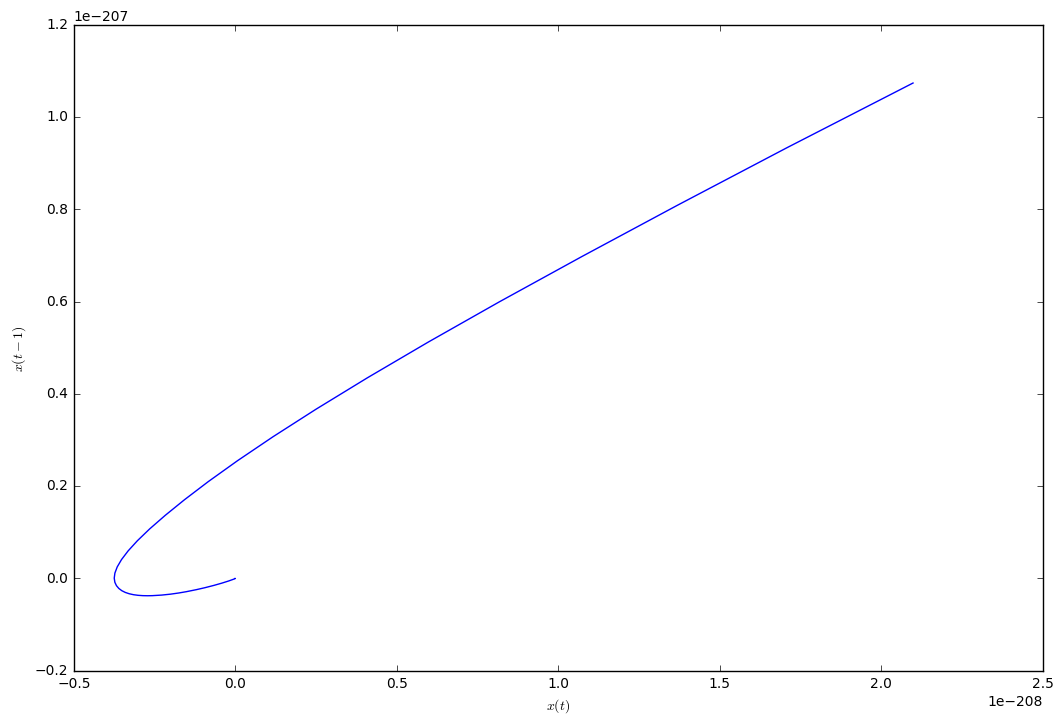

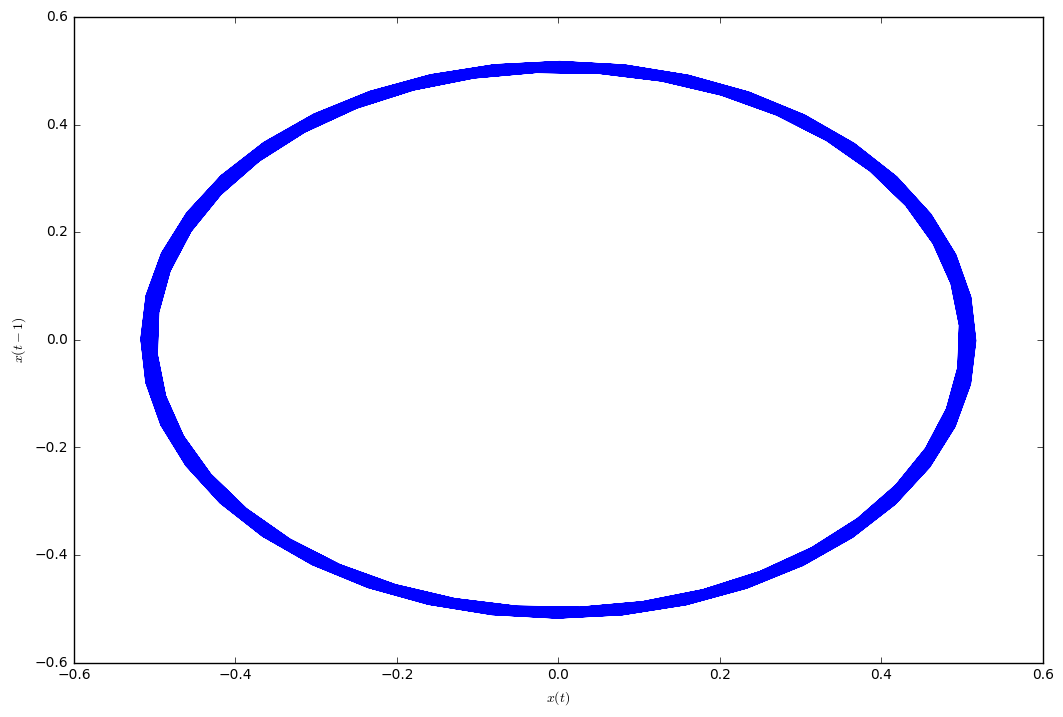

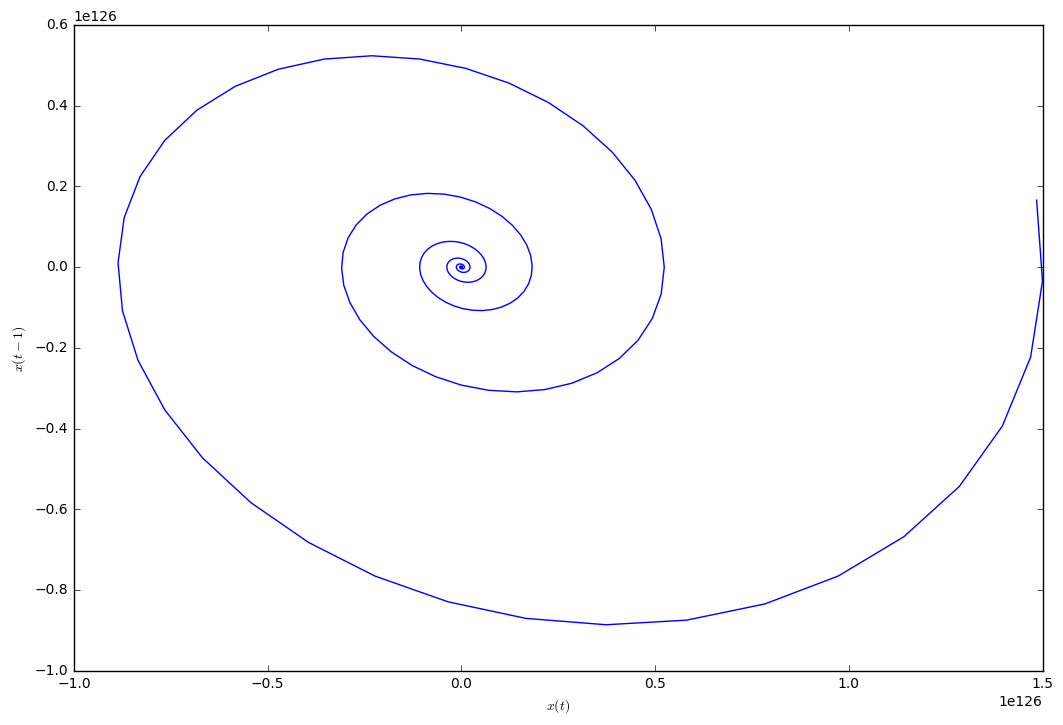

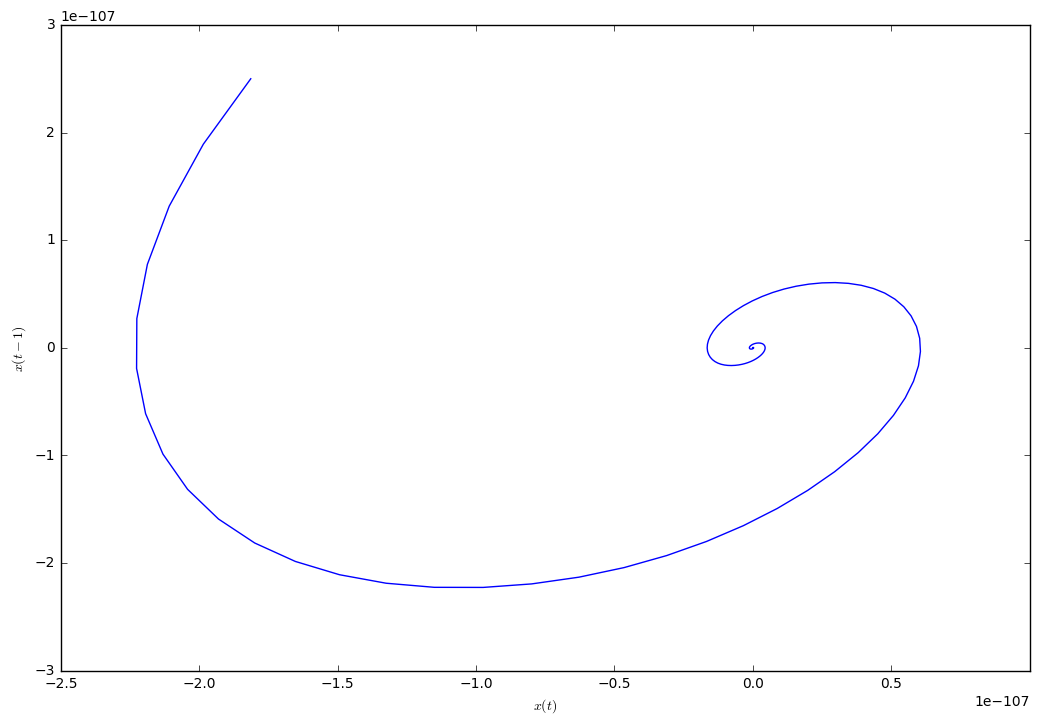

In [8]:
from pydelay import dde23

tau = 1
alphas = [-np.pi/8, -np.pi/2, -3*np.pi/4, -np.pi/4]

# define the equations
eqns = {
    'x' : 'alpha * x(t-tau)'
}

for alpha in alphas:
    params = {
        'tau': tau,
        'alpha'  : alpha
    }

    dde = dde23(eqns=eqns, params=params)

    # solving from t=0 to t=1000 and limit the maximum step size to 1.0
    dde.set_sim_params(tfinal=1000, dtmax=1.0)

    # set value of x0 from {-1, 0} for t between 0 and tau
    histfunc = {
        'x': lambda t: -0.5
    }
    dde.hist_from_funcs(histfunc, 51)

    dde.run()

    # Sample the solution twice with a stepsize of dt=0.1:
    # once in the interval [501, 1000]
    sol1 = dde.sample(500, 1000, 0.1)
    x1 = sol1['x']

    # and once between [500, 1000-tau]
    sol2 = dde.sample(500, 1000-tau, 0.1)
    x2 = sol2['x']

    plt.plot(x1, x2)
    plt.xlabel('$x(t)$')
    plt.ylabel('$x(t - %d)$'%tau)
    plt.show()